#### Importing packages needed for preparing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the data

In [2]:
onlinec2c=pd.read_csv('onlinec2c.csv') 

In [3]:
onlinec2c.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr


#### Data Understanding

In [4]:
onlinec2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [5]:
onlinec2c.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,655.732310,3063.771870,102.125583,8.510424
std,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,7407.430369,168.298621,5.609735,0.467863
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,737028.000000,3205.000000,106.830000,8.900000


#### Data Cleaning

From the descriptive analysis, we see that there are many variables which are not balanced in proportion and therefore they possibly have outliers. Next step in data cleaning is to check outliers for each suspicious variables using boxplot 

{'whiskers': [<matplotlib.lines.Line2D at 0x23dc1517dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc1531460>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc1517a90>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc1531b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc1531f10>],
 'means': []}

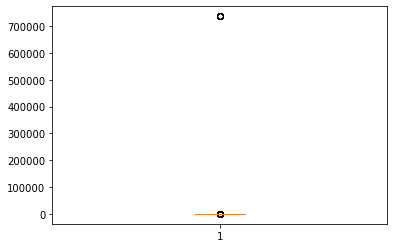

In [6]:
plt.boxplot(onlinec2c['daysSinceLastLogin'])

In [7]:
onlinec2c2=onlinec2c.loc[onlinec2c['daysSinceLastLogin']<366]
onlinec2c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16160 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       16160 non-null  int64  
 1   type                 16160 non-null  object 
 2   country              16160 non-null  object 
 3   language             16160 non-null  object 
 4   socialNbFollowers    16160 non-null  int64  
 5   socialNbFollows      16160 non-null  int64  
 6   socialProductsLiked  16160 non-null  int64  
 7   productsListed       16160 non-null  int64  
 8   productsSold         16160 non-null  int64  
 9   productsPassRate     16160 non-null  float64
 10  productsWished       16160 non-null  int64  
 11  productsBought       16160 non-null  int64  
 12  gender               16160 non-null  object 
 13  civilityGenderId     16160 non-null  int64  
 14  civilityTitle        16160 non-null  object 
 15  hasAnyApp            16160 non-null

In [8]:
onlinec2c2.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.616000e+04,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000
mean,2.510801e+16,4.642389,10.444802,23.905569,0.537500,0.693688,4.534511,8.356188,0.879703,1.812191,148.755879,3062.546535,102.084740,8.507014
std,5.330482e+18,9.239952,130.706866,446.816294,5.031624,5.202763,19.631301,61.409116,5.682876,0.426764,118.466010,168.592187,5.619503,0.468685
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.578586e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,31.000000,2857.000000,95.230000,7.940000
50%,8.932111e+16,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,126.000000,3196.000000,106.530000,8.880000
75%,4.629901e+18,4.000000,8.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,257.000000,3201.000000,106.700000,8.890000
max,9.221188e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,365.000000,3205.000000,106.830000,8.900000


{'whiskers': [<matplotlib.lines.Line2D at 0x23dc17a55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc17a5cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc17a5220>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc17b3430>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc17b37c0>],
 'means': []}

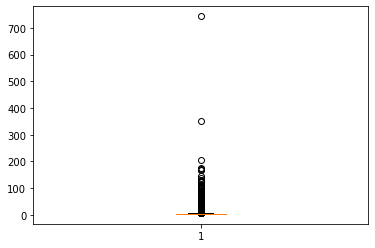

In [9]:
plt.boxplot(onlinec2c2['socialNbFollowers'])

In [10]:
onlinec2c3=onlinec2c2.loc[onlinec2c2['socialNbFollowers']<201]
onlinec2c3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16157 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       16157 non-null  int64  
 1   type                 16157 non-null  object 
 2   country              16157 non-null  object 
 3   language             16157 non-null  object 
 4   socialNbFollowers    16157 non-null  int64  
 5   socialNbFollows      16157 non-null  int64  
 6   socialProductsLiked  16157 non-null  int64  
 7   productsListed       16157 non-null  int64  
 8   productsSold         16157 non-null  int64  
 9   productsPassRate     16157 non-null  float64
 10  productsWished       16157 non-null  int64  
 11  productsBought       16157 non-null  int64  
 12  gender               16157 non-null  object 
 13  civilityGenderId     16157 non-null  int64  
 14  civilityTitle        16157 non-null  object 
 15  hasAnyApp            16157 non-null

In [11]:
onlinec2c3.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.615700e+04,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000
mean,2.449858e+16,4.562666,8.958532,20.363496,0.537105,0.686390,4.526007,8.189330,0.879866,1.812156,148.777929,3062.521755,102.083914,8.506944
std,5.330777e+18,6.446275,30.134984,180.676777,5.031930,5.138138,19.616921,59.305569,5.683391,0.426796,118.465828,168.598029,5.619697,0.468701
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.579139e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,31.000000,2857.000000,95.230000,7.940000
50%,8.867224e+16,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,126.000000,3196.000000,106.530000,8.880000
75%,4.630044e+18,4.000000,8.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,257.000000,3201.000000,106.700000,8.890000
max,9.221188e+18,176.000000,3649.000000,16040.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,365.000000,3205.000000,106.830000,8.900000


{'whiskers': [<matplotlib.lines.Line2D at 0x23dc1b06e50>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc1b145b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc1b06a90>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc1b14cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc1b1e0a0>],
 'means': []}

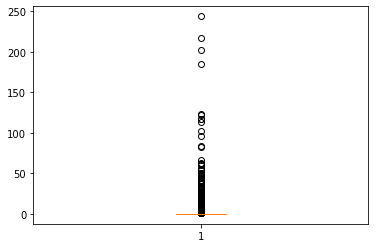

In [12]:
plt.boxplot(onlinec2c3['productsListed'])

In [13]:
onlinec2c4=onlinec2c3.loc[onlinec2c3['productsListed']<71]
onlinec2c4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16144 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       16144 non-null  int64  
 1   type                 16144 non-null  object 
 2   country              16144 non-null  object 
 3   language             16144 non-null  object 
 4   socialNbFollowers    16144 non-null  int64  
 5   socialNbFollows      16144 non-null  int64  
 6   socialProductsLiked  16144 non-null  int64  
 7   productsListed       16144 non-null  int64  
 8   productsSold         16144 non-null  int64  
 9   productsPassRate     16144 non-null  float64
 10  productsWished       16144 non-null  int64  
 11  productsBought       16144 non-null  int64  
 12  gender               16144 non-null  object 
 13  civilityGenderId     16144 non-null  int64  
 14  civilityTitle        16144 non-null  object 
 15  hasAnyApp            16144 non-null

In [14]:
onlinec2c4.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.614400e+04,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000,16144.000000
mean,2.308141e+16,4.502911,8.673005,19.832693,0.425793,0.635035,4.460134,8.140795,0.878593,1.812128,148.868310,3062.560084,102.085191,8.507052
std,5.331126e+18,5.938043,7.803393,171.919501,2.789294,4.709025,19.484080,59.097741,5.684198,0.426699,118.451587,168.590114,5.619433,0.468679
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.579397e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,31.000000,2857.000000,95.230000,7.940000
50%,8.733097e+16,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,126.000000,3196.000000,106.530000,8.880000
75%,4.629392e+18,4.000000,8.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,257.000000,3201.000000,106.700000,8.890000
max,9.221188e+18,176.000000,482.000000,16040.000000,66.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,365.000000,3205.000000,106.830000,8.900000


In [15]:
onlinec2c5=onlinec2c4.loc[onlinec2c4['socialProductsLiked']<2001]
onlinec2c5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16136 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       16136 non-null  int64  
 1   type                 16136 non-null  object 
 2   country              16136 non-null  object 
 3   language             16136 non-null  object 
 4   socialNbFollowers    16136 non-null  int64  
 5   socialNbFollows      16136 non-null  int64  
 6   socialProductsLiked  16136 non-null  int64  
 7   productsListed       16136 non-null  int64  
 8   productsSold         16136 non-null  int64  
 9   productsPassRate     16136 non-null  float64
 10  productsWished       16136 non-null  int64  
 11  productsBought       16136 non-null  int64  
 12  gender               16136 non-null  object 
 13  civilityGenderId     16136 non-null  int64  
 14  civilityTitle        16136 non-null  object 
 15  hasAnyApp            16136 non-null

In [16]:
onlinec2c5.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.613600e+04,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000
mean,2.313500e+16,4.490642,8.664849,17.127603,0.425384,0.634606,4.456148,7.867749,0.865022,1.812159,148.916894,3062.598537,102.086473,8.507160
std,5.331511e+18,5.905393,7.757909,77.626729,2.789597,4.709916,19.474169,56.729195,5.624088,0.426693,118.446459,168.582135,5.619167,0.468657
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.580036e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,31.000000,2857.000000,95.230000,7.940000
50%,8.596267e+16,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,126.000000,3196.000000,106.530000,8.880000
75%,4.629901e+18,4.000000,8.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,257.000000,3201.000000,106.700000,8.890000
max,9.221188e+18,176.000000,482.000000,1929.000000,66.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,365.000000,3205.000000,106.830000,8.900000


{'whiskers': [<matplotlib.lines.Line2D at 0x23dc19dcb20>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc19ec220>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc19dc790>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc19ec940>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc19eccd0>],
 'means': []}

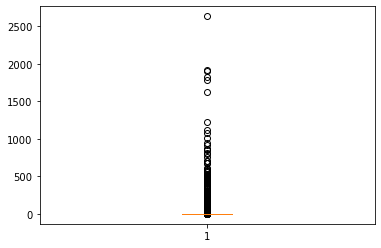

In [17]:
plt.boxplot(onlinec2c5['productsWished'])

In [18]:
onlinec2c6=onlinec2c5.loc[onlinec2c5['productsWished']<2]
onlinec2c6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12313 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       12313 non-null  int64  
 1   type                 12313 non-null  object 
 2   country              12313 non-null  object 
 3   language             12313 non-null  object 
 4   socialNbFollowers    12313 non-null  int64  
 5   socialNbFollows      12313 non-null  int64  
 6   socialProductsLiked  12313 non-null  int64  
 7   productsListed       12313 non-null  int64  
 8   productsSold         12313 non-null  int64  
 9   productsPassRate     12313 non-null  float64
 10  productsWished       12313 non-null  int64  
 11  productsBought       12313 non-null  int64  
 12  gender               12313 non-null  object 
 13  civilityGenderId     12313 non-null  int64  
 14  civilityTitle        12313 non-null  object 
 15  hasAnyApp            12313 non-null

In [19]:
onlinec2c6.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.231300e+04,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000
mean,5.229360e+16,3.977828,8.221961,6.143994,0.342646,0.510192,3.891789,0.120604,0.294404,1.800861,164.156258,3061.031836,102.034230,8.502814
std,5.333255e+18,4.757120,4.272006,32.306235,2.320372,3.954798,18.294064,0.325680,1.647053,0.431623,118.087895,168.878985,5.629054,0.469464
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.577405e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,44.000000,2857.000000,95.230000,7.940000
50%,1.456633e+17,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,159.000000,3196.000000,106.530000,8.880000
75%,4.668238e+18,3.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,273.000000,3201.000000,106.700000,8.890000
max,9.221113e+18,176.000000,431.000000,1270.000000,62.000000,170.000000,100.000000,1.000000,93.000000,3.000000,365.000000,3205.000000,106.830000,8.900000


{'whiskers': [<matplotlib.lines.Line2D at 0x23dc1a4ec10>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc1a5f370>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc1a4e880>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc1a5fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc1a5fe20>],
 'means': []}

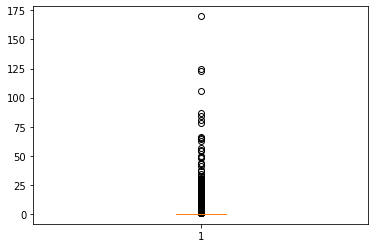

In [20]:
plt.boxplot(onlinec2c6['productsSold'])

In [21]:
onlinec2c7=onlinec2c6.loc[onlinec2c6['productsSold']<35]
onlinec2c7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12290 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       12290 non-null  int64  
 1   type                 12290 non-null  object 
 2   country              12290 non-null  object 
 3   language             12290 non-null  object 
 4   socialNbFollowers    12290 non-null  int64  
 5   socialNbFollows      12290 non-null  int64  
 6   socialProductsLiked  12290 non-null  int64  
 7   productsListed       12290 non-null  int64  
 8   productsSold         12290 non-null  int64  
 9   productsPassRate     12290 non-null  float64
 10  productsWished       12290 non-null  int64  
 11  productsBought       12290 non-null  int64  
 12  gender               12290 non-null  object 
 13  civilityGenderId     12290 non-null  int64  
 14  civilityTitle        12290 non-null  object 
 15  hasAnyApp            12290 non-null

In [22]:
onlinec2c7.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.229000e+04,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000
mean,5.328074e+16,3.855655,8.183238,6.124817,0.303417,0.378682,3.728918,0.120423,0.294874,1.800732,164.426932,3061.022864,102.033932,8.502788
std,5.333553e+18,3.228211,1.875734,32.239507,1.984552,2.106444,17.909501,0.325469,1.648534,0.431771,118.029367,168.880505,5.629105,0.469469
min,-9.221036e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.571965e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,45.000000,2857.000000,95.230000,7.940000
50%,1.440363e+17,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,159.000000,3196.000000,106.530000,8.880000
75%,4.669373e+18,3.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,273.000000,3201.000000,106.700000,8.890000
max,9.221113e+18,94.000000,108.000000,1270.000000,51.000000,34.000000,100.000000,1.000000,93.000000,3.000000,365.000000,3205.000000,106.830000,8.900000


{'whiskers': [<matplotlib.lines.Line2D at 0x23dc2049a30>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc205a190>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc20496a0>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc205a8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc205ac40>],
 'means': []}

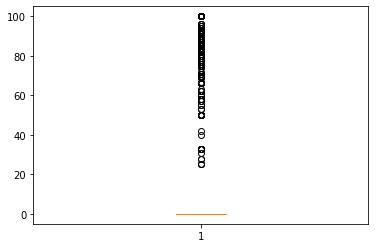

In [23]:
plt.boxplot(onlinec2c7['productsPassRate'])

In [24]:
onlinec2c8=onlinec2c7.loc[onlinec2c7['productsPassRate']<41]
onlinec2c8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11770 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       11770 non-null  int64  
 1   type                 11770 non-null  object 
 2   country              11770 non-null  object 
 3   language             11770 non-null  object 
 4   socialNbFollowers    11770 non-null  int64  
 5   socialNbFollows      11770 non-null  int64  
 6   socialProductsLiked  11770 non-null  int64  
 7   productsListed       11770 non-null  int64  
 8   productsSold         11770 non-null  int64  
 9   productsPassRate     11770 non-null  float64
 10  productsWished       11770 non-null  int64  
 11  productsBought       11770 non-null  int64  
 12  gender               11770 non-null  object 
 13  civilityGenderId     11770 non-null  int64  
 14  civilityTitle        11770 non-null  object 
 15  hasAnyApp            11770 non-null

In [25]:
onlinec2c8.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.177000e+04,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000
mean,4.140626e+16,3.514868,8.129992,5.905947,0.090144,0.059813,0.036788,0.118267,0.286406,1.800425,168.862872,3061.056924,102.035073,8.502881
std,5.332401e+18,2.040542,0.940272,32.257834,0.669509,0.461620,1.075416,0.322937,1.625366,0.428030,117.307801,168.864793,5.628578,0.469433
min,-9.221036e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.584836e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,50.000000,2857.000000,95.230000,7.940000
50%,1.372710e+17,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,167.000000,3196.000000,106.530000,8.880000
75%,4.660743e+18,3.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,276.000000,3201.000000,106.700000,8.890000
max,9.221113e+18,94.000000,44.000000,1270.000000,25.000000,33.000000,40.000000,1.000000,93.000000,3.000000,365.000000,3205.000000,106.830000,8.900000


{'whiskers': [<matplotlib.lines.Line2D at 0x23dc20bdb50>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc20cb2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc20bd7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc20cba00>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc20cbd90>],
 'means': []}

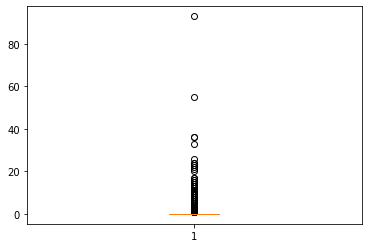

In [26]:
plt.boxplot(onlinec2c8['productsBought'])

In [27]:
onlinec2c9=onlinec2c8.loc[onlinec2c8['productsBought']<20]
onlinec2c9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11757 entries, 17 to 98911
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       11757 non-null  int64  
 1   type                 11757 non-null  object 
 2   country              11757 non-null  object 
 3   language             11757 non-null  object 
 4   socialNbFollowers    11757 non-null  int64  
 5   socialNbFollows      11757 non-null  int64  
 6   socialProductsLiked  11757 non-null  int64  
 7   productsListed       11757 non-null  int64  
 8   productsSold         11757 non-null  int64  
 9   productsPassRate     11757 non-null  float64
 10  productsWished       11757 non-null  int64  
 11  productsBought       11757 non-null  int64  
 12  gender               11757 non-null  object 
 13  civilityGenderId     11757 non-null  int64  
 14  civilityTitle        11757 non-null  object 
 15  hasAnyApp            11757 non-null

{'whiskers': [<matplotlib.lines.Line2D at 0x23dc2145370>,
 'caps': [<matplotlib.lines.Line2D at 0x23dc2145a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dc2135fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x23dc2151190>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dc2151520>],
 'means': []}

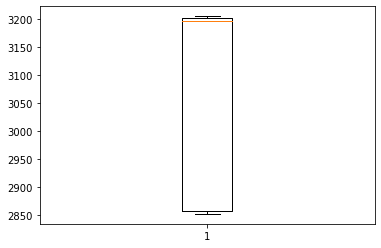

In [28]:
plt.boxplot(onlinec2c9['seniority'])

In [29]:
np.array(list(onlinec2c9.columns),dtype=object)

array(['identifierHash', 'type', 'country', 'language',
       'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate',
       'productsWished', 'productsBought', 'gender', 'civilityGenderId',
       'civilityTitle', 'hasAnyApp', 'hasAndroidApp', 'hasIosApp',
       'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
       'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype=object)

As a result of the data cleaning process, we now have the variables as above 

#### Data Preparation

#### Label Encoding

The purpose of this label encoding process is to divide the datapoints of the desired variables into new proportion

In [30]:
def value_counts(onlinec2c9, col, style=True):
    table = onlinec2c9[col].value_counts().rename_axis('Value').reset_index(name='Count')
    table['Percentage'] = table['Count'] / table['Count'].sum(axis=0)
    
    if style:
        table = table.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'}).hide_index()
        
    return table

In [31]:
value_counts(onlinec2c9, 'country')

Value,Count,Percentage
France,"3,333",28.35%
Etats-Unis,"1,582",13.46%
Royaume-Uni,"1,531",13.02%
Italie,"1,022",8.69%
Allemagne,816,6.94%
Espagne,524,4.46%
Danemark,373,3.17%
Australie,341,2.90%
Suède,321,2.73%
Pays-Bas,210,1.79%


In [32]:
CCT=[] 
for i,j in enumerate (onlinec2c9['country']):
    if j=='France':
        CCT.append(1)
    elif j=='Etats-Unis':
        CCT.append(2) 
    elif j=='Royaume-Uni':
        CCT.append(3)
    elif j=='Italie':
        CCT.append(4)
    elif j=='Allemagne':
        CCT.append(5)
    elif j=='Espagne':
        CCT.append(6)
    elif j=='Australie':
        CCT.append(7)
    elif j=='Danemark':
        CCT.append(8)
    elif j=='Suède':
        CCT.append(9)
    elif j=='Belgique':
        CCT.append(10)
    elif j=='Canada':
        CCT.append(11)
    elif j=='Pays-Bas':
        CCT.append(12)
    elif j=='Suisse':
        CCT.append(13)
    elif j=='Finlande':
        CCT.append(14)
    elif j=='Hong Kong':
        CCT.append(15)
    else:
        CCT.append(0)
onlinec2c9['Common_Country_Type']=CCT
onlinec2c9.head()

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_5648/3698342471.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinec2c9['Common_Country_Type']=CCT


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Common_Country_Type
17,-8231936648814680895,user,Danemark,en,3,8,370,0,0,0.0,...,False,False,False,True,42,3205,106.83,8.9,dk,8
18,5663923945758514393,user,Etats-Unis,en,3,8,1,0,0,0.0,...,False,False,False,True,32,3205,106.83,8.9,us,2
19,-9170487442747331639,user,France,fr,3,8,0,0,0,0.0,...,False,False,False,True,276,3205,106.83,8.9,fr,1
28,8289779812823004887,user,Allemagne,de,3,8,0,0,0,0.0,...,False,False,False,True,338,3205,106.83,8.9,de,5
41,-5310722561526223811,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,False,False,False,True,159,3205,106.83,8.9,gb,3


In [33]:
value_counts(onlinec2c9, 'language')

Value,Count,Percentage
en,"5,802",49.35%
fr,"3,536",30.08%
it,984,8.37%
de,920,7.83%
es,515,4.38%


In [34]:
CLT=[] 
for i,j in enumerate (onlinec2c9['language']):
    if j=='en':
        CLT.append(1)
    elif j=='fr':
        CLT.append(2) 
    elif j=='it':
        CLT.append(3)
    elif j=='de':
        CLT.append(4)
    else:
        CLT.append(0)
onlinec2c9['Common_Language_Type']=CLT
onlinec2c9.head()

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_5648/1071835983.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinec2c9['Common_Language_Type']=CLT


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Common_Country_Type,Common_Language_Type
17,-8231936648814680895,user,Danemark,en,3,8,370,0,0,0.0,...,False,False,True,42,3205,106.83,8.9,dk,8,1
18,5663923945758514393,user,Etats-Unis,en,3,8,1,0,0,0.0,...,False,False,True,32,3205,106.83,8.9,us,2,1
19,-9170487442747331639,user,France,fr,3,8,0,0,0,0.0,...,False,False,True,276,3205,106.83,8.9,fr,1,2
28,8289779812823004887,user,Allemagne,de,3,8,0,0,0,0.0,...,False,False,True,338,3205,106.83,8.9,de,5,4
41,-5310722561526223811,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,False,False,True,159,3205,106.83,8.9,gb,3,1


In [35]:
value_counts(onlinec2c9, 'civilityTitle')

Value,Count,Percentage
mrs,"9,137",77.72%
mr,"2,482",21.11%
miss,138,1.17%


In [36]:
value_counts(onlinec2c9, 'gender')

Value,Count,Percentage
F,"9,275",78.89%
M,"2,482",21.11%


In [37]:
value_counts(onlinec2c9, 'civilityGenderId')

Value,Count,Percentage
2,"9,137",77.72%
1,"2,482",21.11%
3,138,1.17%


In [38]:
CGT=[] 
for i,j in enumerate (onlinec2c9['gender']):
    if j=='F':
        CGT.append(1)
    else:
        CGT.append(0)
onlinec2c9['Common_Gender_Type']=CGT
onlinec2c9.head()

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_5648/3697850213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinec2c9['Common_Gender_Type']=CGT


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Common_Country_Type,Common_Language_Type,Common_Gender_Type
17,-8231936648814680895,user,Danemark,en,3,8,370,0,0,0.0,...,False,True,42,3205,106.83,8.9,dk,8,1,1
18,5663923945758514393,user,Etats-Unis,en,3,8,1,0,0,0.0,...,False,True,32,3205,106.83,8.9,us,2,1,1
19,-9170487442747331639,user,France,fr,3,8,0,0,0,0.0,...,False,True,276,3205,106.83,8.9,fr,1,2,0
28,8289779812823004887,user,Allemagne,de,3,8,0,0,0,0.0,...,False,True,338,3205,106.83,8.9,de,5,4,1
41,-5310722561526223811,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,False,True,159,3205,106.83,8.9,gb,3,1,1


In [39]:
CAT=[] 
for i,j in enumerate (onlinec2c9['hasAnyApp']):
    if j==True:
        CAT.append(1)
    else:
        CAT.append(0)
onlinec2c9['Common_AnyApp_Type']=CAT
onlinec2c9.head()

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_5648/517741077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinec2c9['Common_AnyApp_Type']=CAT


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Common_Country_Type,Common_Language_Type,Common_Gender_Type,Common_AnyApp_Type
17,-8231936648814680895,user,Danemark,en,3,8,370,0,0,0.0,...,True,42,3205,106.83,8.9,dk,8,1,1,0
18,5663923945758514393,user,Etats-Unis,en,3,8,1,0,0,0.0,...,True,32,3205,106.83,8.9,us,2,1,1,0
19,-9170487442747331639,user,France,fr,3,8,0,0,0,0.0,...,True,276,3205,106.83,8.9,fr,1,2,0,0
28,8289779812823004887,user,Allemagne,de,3,8,0,0,0,0.0,...,True,338,3205,106.83,8.9,de,5,4,1,0
41,-5310722561526223811,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,True,159,3205,106.83,8.9,gb,3,1,1,0


In [40]:
CAAT=[] 
for i,j in enumerate (onlinec2c9['hasAndroidApp']):
    if j==True:
        CAAT.append(1)
    else:
        CAAT.append(0)
onlinec2c9['Common_AndroidApp_Type']=CAAT
onlinec2c9.head()

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_5648/1154121941.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinec2c9['Common_AndroidApp_Type']=CAAT


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Common_Country_Type,Common_Language_Type,Common_Gender_Type,Common_AnyApp_Type,Common_AndroidApp_Type
17,-8231936648814680895,user,Danemark,en,3,8,370,0,0,0.0,...,42,3205,106.83,8.9,dk,8,1,1,0,0
18,5663923945758514393,user,Etats-Unis,en,3,8,1,0,0,0.0,...,32,3205,106.83,8.9,us,2,1,1,0,0
19,-9170487442747331639,user,France,fr,3,8,0,0,0,0.0,...,276,3205,106.83,8.9,fr,1,2,0,0,0
28,8289779812823004887,user,Allemagne,de,3,8,0,0,0,0.0,...,338,3205,106.83,8.9,de,5,4,1,0,0
41,-5310722561526223811,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,159,3205,106.83,8.9,gb,3,1,1,0,0


In [41]:
CIAT=[] 
for i,j in enumerate (onlinec2c9['hasIosApp']):
    if j==True:
        CIAT.append(1)
    else:
        CIAT.append(0)
onlinec2c9['Common_IosApp_Type']=CIAT
onlinec2c9.head()

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_5648/1465115479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinec2c9['Common_IosApp_Type']=CIAT


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Common_Country_Type,Common_Language_Type,Common_Gender_Type,Common_AnyApp_Type,Common_AndroidApp_Type,Common_IosApp_Type
17,-8231936648814680895,user,Danemark,en,3,8,370,0,0,0.0,...,3205,106.83,8.9,dk,8,1,1,0,0,0
18,5663923945758514393,user,Etats-Unis,en,3,8,1,0,0,0.0,...,3205,106.83,8.9,us,2,1,1,0,0,0
19,-9170487442747331639,user,France,fr,3,8,0,0,0,0.0,...,3205,106.83,8.9,fr,1,2,0,0,0,0
28,8289779812823004887,user,Allemagne,de,3,8,0,0,0,0.0,...,3205,106.83,8.9,de,5,4,1,0,0,0
41,-5310722561526223811,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,3205,106.83,8.9,gb,3,1,1,0,0,0


In [42]:
CPPT=[] 
for i,j in enumerate (onlinec2c9['hasProfilePicture']):
    if j==True:
        CPPT.append(1)
    else:
        CPPT.append(0)
onlinec2c9['Common_ProfilePicture_Type']=CPPT
onlinec2c9.head()

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_5648/1707148894.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlinec2c9['Common_ProfilePicture_Type']=CPPT


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,seniorityAsMonths,seniorityAsYears,countryCode,Common_Country_Type,Common_Language_Type,Common_Gender_Type,Common_AnyApp_Type,Common_AndroidApp_Type,Common_IosApp_Type,Common_ProfilePicture_Type
17,-8231936648814680895,user,Danemark,en,3,8,370,0,0,0.0,...,106.83,8.9,dk,8,1,1,0,0,0,1
18,5663923945758514393,user,Etats-Unis,en,3,8,1,0,0,0.0,...,106.83,8.9,us,2,1,1,0,0,0,1
19,-9170487442747331639,user,France,fr,3,8,0,0,0,0.0,...,106.83,8.9,fr,1,2,0,0,0,0,1
28,8289779812823004887,user,Allemagne,de,3,8,0,0,0,0.0,...,106.83,8.9,de,5,4,1,0,0,0,1
41,-5310722561526223811,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,106.83,8.9,gb,3,1,1,0,0,0,1


After going through label encoding process, we would want to take the integer variables only

In [43]:
c2c=onlinec2c9.drop(['identifierHash','countryCode','gender','type','civilityTitle','country','language','hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture','seniorityAsYears','seniorityAsMonths'],axis=1)
c2c.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,Common_Country_Type,Common_Language_Type,Common_Gender_Type,Common_AnyApp_Type,Common_AndroidApp_Type,Common_IosApp_Type,Common_ProfilePicture_Type
17,3,8,370,0,0,0.0,1,0,2,42,3205,8,1,1,0,0,0,1
18,3,8,1,0,0,0.0,0,0,2,32,3205,2,1,1,0,0,0,1
19,3,8,0,0,0,0.0,0,0,1,276,3205,1,2,0,0,0,0,1
28,3,8,0,0,0,0.0,0,0,2,338,3205,5,4,1,0,0,0,1
41,3,8,0,0,0,0.0,0,0,2,159,3205,3,1,1,0,0,0,1


In [44]:
c2c=c2c.reset_index(drop=True)
c2c.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,Common_Country_Type,Common_Language_Type,Common_Gender_Type,Common_AnyApp_Type,Common_AndroidApp_Type,Common_IosApp_Type,Common_ProfilePicture_Type
0,3,8,370,0,0,0.0,1,0,2,42,3205,8,1,1,0,0,0,1
1,3,8,1,0,0,0.0,0,0,2,32,3205,2,1,1,0,0,0,1
2,3,8,0,0,0,0.0,0,0,1,276,3205,1,2,0,0,0,0,1
3,3,8,0,0,0,0.0,0,0,2,338,3205,5,4,1,0,0,0,1
4,3,8,0,0,0,0.0,0,0,2,159,3205,3,1,1,0,0,0,1


From the VIF below, we could say that there is multicollinearity on some variables such civilityGenderId, socialNbFollows, and other variables which has VIF greater than 10

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = c2c.columns
vif["VIF"] = [variance_inflation_factor(c2c.values, i) for i in range(c2c.shape[1])]

print(vif)

                     variables         VIF
0            socialNbFollowers    6.727550
1              socialNbFollows   74.059942
2          socialProductsLiked    1.142014
3               productsListed    1.158139
4                 productsSold    1.979225
5             productsPassRate    1.419746
6               productsWished    1.186504
7               productsBought    1.149075
8             civilityGenderId  249.193668
9           daysSinceLastLogin    3.241106
10                   seniority  133.646737
11         Common_Country_Type    2.151506
12        Common_Language_Type    3.954529
13          Common_Gender_Type   65.271220
14          Common_AnyApp_Type  123.175320
15      Common_AndroidApp_Type   13.866289
16          Common_IosApp_Type  108.067120
17  Common_ProfilePicture_Type   27.194359


In [46]:
c2c=c2c.drop(['socialNbFollows','civilityGenderId','seniority','Common_Gender_Type','Common_AnyApp_Type','Common_AndroidApp_Type','Common_IosApp_Type','Common_ProfilePicture_Type'],axis=1)
c2c.head()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type
0,3,370,0,0,0.0,1,0,42,8,1
1,3,1,0,0,0.0,0,0,32,2,1
2,3,0,0,0,0.0,0,0,276,1,2
3,3,0,0,0,0.0,0,0,338,5,4
4,3,0,0,0,0.0,0,0,159,3,1


As a result, we now only have ten variables as we can see in the table above

#### Data Analysis

#### Importing required packages for data analysis process

In [47]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


#### Kaiser Meyer Olkin (KMO TEST)

KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are good. We can also say it as a measure of how suited our data is for factor analysis.

In [48]:
from factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(c2c)
print(kmo_model)

0.606795180140393


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from factor_analyzer import FactorAnalyzer

We would want to do a scaling for our data to prepare it for the next analysis process

In [51]:
scaler =  StandardScaler()
dataframe = scaler.fit_transform(c2c)
dataframe = pd.DataFrame(data=dataframe,columns=c2c.columns)
dataframe.head(10)

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type
0,-0.251077,11.635071,-0.134724,-0.129650,-0.034229,2.729870,-0.249625,-1.083227,1.279725,-0.676506
1,-0.251077,-0.153589,-0.134724,-0.129650,-0.034229,-0.366318,-0.249625,-1.168504,-0.469100,-0.676506
2,-0.251077,-0.185536,-0.134724,-0.129650,-0.034229,-0.366318,-0.249625,0.912251,-0.760571,0.349908
3,-0.251077,-0.185536,-0.134724,-0.129650,-0.034229,-0.366318,-0.249625,1.440967,0.405312,2.402737
4,-0.251077,-0.185536,-0.134724,-0.129650,-0.034229,-0.366318,-0.249625,-0.085488,-0.177629,-0.676506
5,13.490187,-0.185536,1.358162,2.035549,-0.034229,-0.366318,0.750320,-0.358374,-0.760571,0.349908
6,-0.251077,-0.185536,-0.134724,-0.129650,-0.034229,-0.366318,-0.249625,-1.296419,0.696783,-1.702921
7,-0.251077,1.603529,-0.134724,-0.129650,-0.034229,-0.366318,-0.249625,-1.296419,-0.760571,0.349908
8,-0.251077,-0.185536,-0.134724,-0.129650,-0.034229,-0.366318,1.750264,-1.211142,-0.177629,-0.676506
9,-0.251077,-0.185536,-0.134724,-0.129650,-0.034229,-0.366318,-0.249625,-1.117338,-0.177629,-0.676506


In [52]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])

In [53]:
fa.fit(dataframe)

FactorAnalyzer(impute='drop', n_factors=10, rotation=None, rotation_kwargs={})

In [54]:
ev,_ = fa.get_eigenvalues()

#### Bartlett

In [55]:
from factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(dataframe)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  10770.775306280337
p value :  0.0


Since the p test statistic is less than 0.05, we can conclude that correlation is present among the variables which is a green signal to apply factor analysis.

#### Determining number of factors

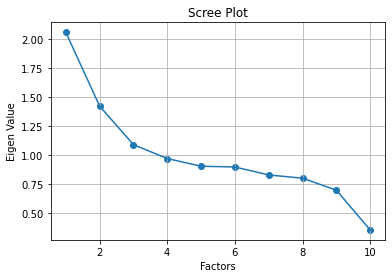

In [56]:
plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigenvalues.

Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1.

The eigenvalues function will return the original eigenvalues and the common factor eigenvalues. Now, we are going to consider only the original eigenvalues. From the graph, we can see that the eigenvalues drop below 1 from the 4th factor. So, the optimal number of factors is 4.

#### Interpreting the Factors

In [57]:
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(c2c)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [58]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues']))

   EigenValues
0     2.056862
1     1.419860
2     1.087489
3     0.967820
4     0.901347
5     0.894987
6     0.826264
7     0.798417
8     0.694782
9     0.352171


#### Loading score

In [59]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.loadings_,index=dataframe.columns))

                             0         1         2         3
socialNbFollowers     0.508138  0.032049  0.311218  0.033705
socialProductsLiked   0.023084 -0.020140  0.458614  0.024671
productsListed        0.307195 -0.080362  0.007448 -0.060292
productsSold          1.000371  0.005483 -0.013391 -0.019574
productsPassRate      0.525943  0.021590 -0.018787  0.023421
productsWished        0.010103 -0.047236  0.275558  0.029303
productsBought        0.028463 -0.051757  0.406355  0.015766
daysSinceLastLogin   -0.066559  0.971353 -0.214882 -0.033397
Common_Country_Type  -0.011252 -0.030170  0.078879  0.375240
Common_Language_Type  0.010967 -0.010013  0.009739 -0.259683


Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

For example, in Factor 0, we can see that the features ‘productsSold’, 'socialNbFollowers' and ‘productsPassRate’ have high loadings than other variables. From this, we can see that Factor 0, explains the common variance in categories which are reserved i.e. the variance among the users' interaction which are included in 'productsSold', 'productPassRate', and 'socialNbFollowers'.

#### Variance

In [60]:
with np.printoptions(suppress=True,precision=4):
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          1.636053  0.957834  0.601318  0.216774
Proportional Var  0.163605  0.095783  0.060132  0.021677
Cumulative Var    0.163605  0.259389  0.319521  0.341198


The first row represents the variance explained by each factor. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 4 factors together are able to explain 34.1% of the total variance.

In unrotated cases, the variances would be equal to the eigenvalues. Rotation changes the distribution of proportional variance but the cumulative variance will remain the same. Oblique rotations allow correlation between the factors while the orthogonal rotations keep the factors uncorrelated.

**Communalities**

Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables

In [61]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

                      Communalities
socialNbFollowers          0.357224
socialProductsLiked        0.211874
productsListed             0.104517
productsSold               1.001334
productsPassRate           0.277984
productsWished             0.079124
productsBought             0.168862
daysSinceLastLogin         0.995246
Common_Country_Type        0.148064
Common_Language_Type       0.067750


The proportion of each variable’s variance that is explained by the factors can be inferred from the above. For example, we could consider the variable ‘productsSold’ about 100.1% of its variance is explained by all the factors together

#### Confirming the relation of each variables using correlation table

In [62]:
c2c.corr()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type
socialNbFollowers,1.000000,0.156689,0.177799,0.505115,0.246443,0.081467,0.143143,-0.068532,0.032951,-0.004990
socialProductsLiked,0.156689,1.000000,0.003319,0.017130,0.004527,0.130825,0.184259,-0.121102,0.048898,0.005117
productsListed,0.177799,0.003319,1.000000,0.304205,0.142906,0.002544,0.006492,-0.099341,-0.023006,0.020423
productsSold,0.505115,0.017130,0.304205,1.000000,0.538826,0.006106,0.020304,-0.058410,-0.020561,0.017579
productsPassRate,0.246443,0.004527,0.142906,0.538826,1.000000,0.009734,0.012324,-0.010794,-0.000135,0.000050
productsWished,0.081467,0.130825,0.002544,0.006106,0.009734,1.000000,0.119752,-0.106773,0.033566,-0.003731
productsBought,0.143143,0.184259,0.006492,0.020304,0.012324,0.119752,1.000000,-0.141013,0.033921,-0.003618
daysSinceLastLogin,-0.068532,-0.121102,-0.099341,-0.058410,-0.010794,-0.106773,-0.141013,1.000000,-0.058327,-0.003766
Common_Country_Type,0.032951,0.048898,-0.023006,-0.020561,-0.000135,0.033566,0.033921,-0.058327,1.000000,-0.096248
Common_Language_Type,-0.004990,0.005117,0.020423,0.017579,0.000050,-0.003731,-0.003618,-0.003766,-0.096248,1.000000


#### Hirarchieral Clustering

In [63]:
from sklearn.preprocessing import normalize
data_scaled = normalize(c2c)
data_scaled = pd.DataFrame(data_scaled, columns=c2c.columns)
data_scaled.head()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type
0,0.008054,0.993350,0.0,0.0,0.0,0.002685,0.0,0.112759,0.021478,0.002685
1,0.093071,0.031024,0.0,0.0,0.0,0.000000,0.0,0.992755,0.062047,0.031024
2,0.010869,0.000000,0.0,0.0,0.0,0.000000,0.0,0.999908,0.003623,0.007246
3,0.008874,0.000000,0.0,0.0,0.0,0.000000,0.0,0.999781,0.014790,0.011832
4,0.018861,0.000000,0.0,0.0,0.0,0.000000,0.0,0.999624,0.018861,0.006287


In [64]:
import scipy.cluster.hierarchy as shc

In [65]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   socialNbFollowers     11757 non-null  float64
 1   socialProductsLiked   11757 non-null  float64
 2   productsListed        11757 non-null  float64
 3   productsSold          11757 non-null  float64
 4   productsPassRate      11757 non-null  float64
 5   productsWished        11757 non-null  float64
 6   productsBought        11757 non-null  float64
 7   daysSinceLastLogin    11757 non-null  float64
 8   Common_Country_Type   11757 non-null  float64
 9   Common_Language_Type  11757 non-null  float64
dtypes: float64(10)
memory usage: 918.6 KB


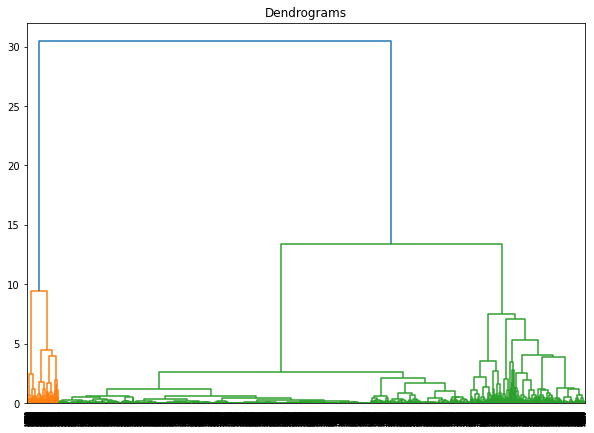

In [66]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 15 and cut the dendrogram:

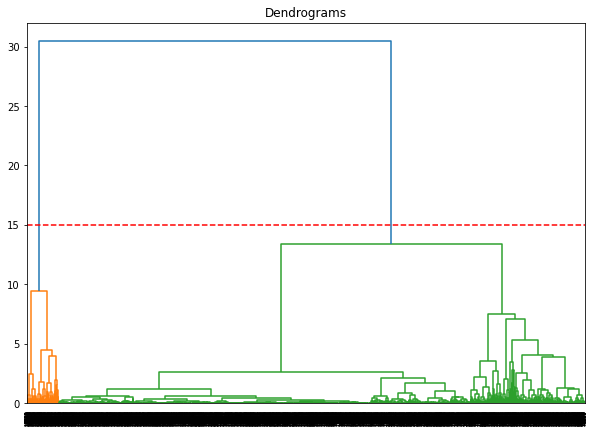

In [67]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [68]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

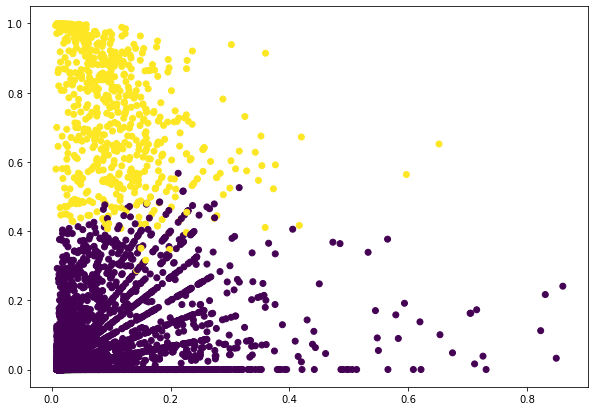

In [69]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['socialNbFollowers'], data_scaled['socialProductsLiked'], c=cluster.labels_) 

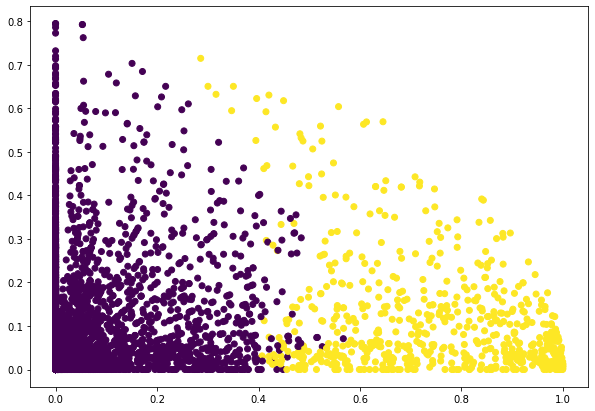

In [70]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['socialProductsLiked'], data_scaled['Common_Country_Type'], c=cluster.labels_) 

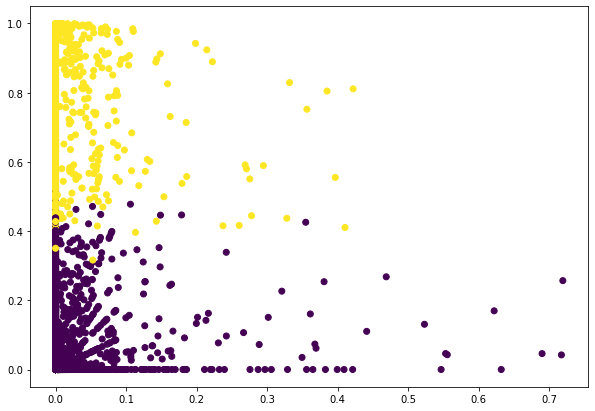

In [71]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['productsBought'], data_scaled['socialProductsLiked'], c=cluster.labels_) 

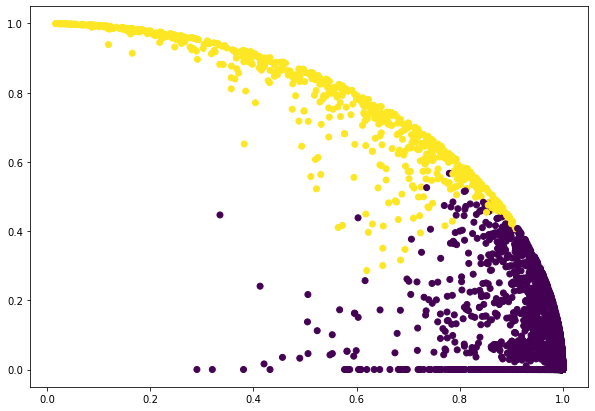

In [72]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['daysSinceLastLogin'], data_scaled['socialProductsLiked'], c=cluster.labels_) 

Above are some combination of variables to divide the datapoints into to clusters. We see that almost all scatterplots give a quite distinguished area division of clusters

In [73]:
data_scaled.corr()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type
socialNbFollowers,1.000000,0.253686,0.258330,0.357925,0.086315,0.318005,0.291824,-0.336891,0.534625,0.702662
socialProductsLiked,0.253686,1.000000,0.048971,0.060325,0.000453,0.218725,0.164027,-0.894699,0.188121,0.178113
productsListed,0.258330,0.048971,1.000000,0.354144,0.077617,0.034024,0.018427,-0.146152,0.094708,0.185064
productsSold,0.357925,0.060325,0.354144,1.000000,0.335300,0.062931,0.055605,-0.140398,0.101975,0.181801
productsPassRate,0.086315,0.000453,0.077617,0.335300,1.000000,0.014834,0.015496,-0.096368,0.010327,-0.002120
productsWished,0.318005,0.218725,0.034024,0.062931,0.014834,1.000000,0.162154,-0.185829,0.212188,0.273785
productsBought,0.291824,0.164027,0.018427,0.055605,0.015496,0.162154,1.000000,-0.225953,0.189377,0.183661
daysSinceLastLogin,-0.336891,-0.894699,-0.146152,-0.140398,-0.096368,-0.185829,-0.225953,1.000000,-0.322393,-0.213492
Common_Country_Type,0.534625,0.188121,0.094708,0.101975,0.010327,0.212188,0.189377,-0.322393,1.000000,0.441517
Common_Language_Type,0.702662,0.178113,0.185064,0.181801,-0.002120,0.273785,0.183661,-0.213492,0.441517,1.000000


Seeing from the correlation table above and the scatterplot visualization, the better division is generated from two variables which have low correlation

In [74]:
c2c.describe()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type
count,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000
mean,3.511610,5.807519,0.090244,0.059879,0.036829,0.118312,0.249639,169.024751,3.609424,1.659097
std,2.037745,31.302600,0.669872,0.461871,1.076009,0.322992,1.000098,117.270127,3.431020,0.974307
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,1.000000,1.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.000000,3.000000,1.000000
75%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.000000,5.000000,2.000000
max,94.000000,1270.000000,25.000000,33.000000,40.000000,1.000000,17.000000,365.000000,15.000000,4.000000


In [75]:
group=cluster.labels_
c2c['cluster']=group
c2c.head()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type,cluster
0,3,370,0,0,0.0,1,0,42,8,1,1
1,3,1,0,0,0.0,0,0,32,2,1,0
2,3,0,0,0,0.0,0,0,276,1,2,0
3,3,0,0,0,0.0,0,0,338,5,4,0
4,3,0,0,0,0.0,0,0,159,3,1,0


In [76]:
ccluster0=c2c.loc[c2c['cluster']==0]
ccluster0.describe()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type,cluster
count,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.0
mean,3.457571,2.031022,0.085851,0.057354,0.039048,0.104698,0.199477,177.261791,3.565425,1.661015,0.0
std,1.960474,6.088552,0.662614,0.463642,1.107909,0.306178,0.857694,115.196893,3.399224,0.972973,0.0
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.0
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,1.000000,0.0
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.000000,2.000000,1.000000,0.0
75%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.000000,5.000000,2.000000,0.0
max,94.000000,116.000000,25.000000,33.000000,40.000000,1.000000,17.000000,365.000000,15.000000,4.000000,0.0


In [77]:
ccluster0.loc[(ccluster0['socialProductsLiked']>0)].count()

socialNbFollowers       3957
socialProductsLiked     3957
productsListed          3957
productsSold            3957
productsPassRate        3957
productsWished          3957
productsBought          3957
daysSinceLastLogin      3957
Common_Country_Type     3957
Common_Language_Type    3957
cluster                 3957
dtype: int64

In [78]:
ccluster0.loc[(ccluster0['productsWished']>0)].count()

socialNbFollowers       1161
socialProductsLiked     1161
productsListed          1161
productsSold            1161
productsPassRate        1161
productsWished          1161
productsBought          1161
daysSinceLastLogin      1161
Common_Country_Type     1161
Common_Language_Type    1161
cluster                 1161
dtype: int64

In [79]:
ccluster0.loc[(ccluster0['productsBought']>0)].count()

socialNbFollowers       1205
socialProductsLiked     1205
productsListed          1205
productsSold            1205
productsPassRate        1205
productsWished          1205
productsBought          1205
daysSinceLastLogin      1205
Common_Country_Type     1205
Common_Language_Type    1205
cluster                 1205
dtype: int64

In [80]:
ccluster0.loc[(ccluster0['productsListed']>0)].count()

socialNbFollowers       470
socialProductsLiked     470
productsListed          470
productsSold            470
productsPassRate        470
productsWished          470
productsBought          470
daysSinceLastLogin      470
Common_Country_Type     470
Common_Language_Type    470
cluster                 470
dtype: int64

In [81]:
ccluster0.loc[(ccluster0['productsSold']>0)].count()

socialNbFollowers       439
socialProductsLiked     439
productsListed          439
productsSold            439
productsPassRate        439
productsWished          439
productsBought          439
daysSinceLastLogin      439
Common_Country_Type     439
Common_Language_Type    439
cluster                 439
dtype: int64

In [82]:
ccluster1=c2c.loc[c2c['cluster']==1]
ccluster1.describe()

,socialNbFollowers,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,Common_Country_Type,Common_Language_Type,cluster
count,668.000000,668.000000,668.000000,668.000000,668.0,668.000000,668.000000,668.000000,668.000000,668.000000,668.0
mean,4.408683,68.498503,0.163174,0.101796,0.0,0.344311,1.082335,32.287425,4.339820,1.627246,1.0
std,2.905155,111.716973,0.777508,0.429563,0.0,0.475499,2.159485,43.951159,3.851412,0.996383,0.0
min,3.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,11.000000,0.000000,0.000000,1.0
25%,3.000000,17.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,1.000000,1.000000,1.0
50%,3.000000,31.000000,0.000000,0.000000,0.0,0.000000,0.000000,17.000000,3.000000,1.000000,1.0
75%,5.000000,65.250000,0.000000,0.000000,0.0,1.000000,1.000000,30.000000,6.000000,2.000000,1.0
max,32.000000,1270.000000,11.000000,6.000000,0.0,1.000000,16.000000,356.000000,15.000000,4.000000,1.0


In [83]:
ccluster1.loc[(ccluster1['socialProductsLiked']>0)].count()

socialNbFollowers       668
socialProductsLiked     668
productsListed          668
productsSold            668
productsPassRate        668
productsWished          668
productsBought          668
daysSinceLastLogin      668
Common_Country_Type     668
Common_Language_Type    668
cluster                 668
dtype: int64

In [84]:
ccluster1.loc[(ccluster1['productsWished']>0)].count()

socialNbFollowers       230
socialProductsLiked     230
productsListed          230
productsSold            230
productsPassRate        230
productsWished          230
productsBought          230
daysSinceLastLogin      230
Common_Country_Type     230
Common_Language_Type    230
cluster                 230
dtype: int64

In [85]:
ccluster1.loc[(ccluster1['productsBought']>0)].count()

socialNbFollowers       259
socialProductsLiked     259
productsListed          259
productsSold            259
productsPassRate        259
productsWished          259
productsBought          259
daysSinceLastLogin      259
Common_Country_Type     259
Common_Language_Type    259
cluster                 259
dtype: int64

In [86]:
ccluster1.loc[(ccluster1['productsListed']>0)].count()

socialNbFollowers       51
socialProductsLiked     51
productsListed          51
productsSold            51
productsPassRate        51
productsWished          51
productsBought          51
daysSinceLastLogin      51
Common_Country_Type     51
Common_Language_Type    51
cluster                 51
dtype: int64

In [87]:
ccluster1.loc[(ccluster1['productsSold']>0)].count()

socialNbFollowers       49
socialProductsLiked     49
productsListed          49
productsSold            49
productsPassRate        49
productsWished          49
productsBought          49
daysSinceLastLogin      49
Common_Country_Type     49
Common_Language_Type    49
cluster                 49
dtype: int64

The cluster 1 suggest that it is the active user group and cluster 0 is the passive user group